<a href="https://colab.research.google.com/github/Luissalamanca23/Fundamentos-ML/blob/main/f1_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Intalacion dependencia para dataset

In [2]:
!pip install kagglehub[pandas-datasets]

In [3]:
!pip install --no-cache-dir --force-reinstall ace_tools

In [4]:
!pip list | grep ace_tools

ace_tools                          0.0


In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [5]:
names_of_datasets = ['circuits', 'constructor_results', 'constructor_standings', 'constructors', 'driver_standings', 'drivers', 'lap_times', 'qualifying', 'races', 'results', 'seasons', 'sprint_results', 'status', 'pit_stops']

In [6]:
# Create a dictionary to store the DataFrames
dataframes = {}

In [7]:
from google.colab import drive
drive.mount('/content/Drive')

Mounted at /content/Drive


In [8]:
folder_path = '/content/Drive/MyDrive/Machine/Ejercicio/Datos'

if not os.path.exists(folder_path):
       os.makedirs(folder_path)

In [9]:
for i in names_of_datasets:
    print(f"Loading {i}...")

    # Load the dataset and store it in the dictionary using the desired variable name
    dataframes[f"{i}_df"] = kagglehub.load_dataset(
        KaggleDatasetAdapter.PANDAS,
        "rohanrao/formula-1-world-championship-1950-2020",
        path=f"{i}.csv"
    )
    file_path = os.path.join(folder_path, f'{i}_df.csv')
    dataframes[f"{i}_df"].to_csv(file_path, index=False)

Loading circuits...


<ipython-input-9-8a8c0003e614>:5: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  dataframes[f"{i}_df"] = kagglehub.load_dataset(


100%|██████████| 9.87k/9.87k [00:00<00:00, 761kB/s]


Loading constructor_results...


<ipython-input-9-8a8c0003e614>:5: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  dataframes[f"{i}_df"] = kagglehub.load_dataset(


100%|██████████| 214k/214k [00:00<00:00, 26.3MB/s]


Loading constructor_standings...


<ipython-input-9-8a8c0003e614>:5: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  dataframes[f"{i}_df"] = kagglehub.load_dataset(


100%|██████████| 310k/310k [00:00<00:00, 42.1MB/s]


Loading constructors...


<ipython-input-9-8a8c0003e614>:5: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  dataframes[f"{i}_df"] = kagglehub.load_dataset(


100%|██████████| 17.1k/17.1k [00:00<00:00, 4.34MB/s]


Loading driver_standings...


<ipython-input-9-8a8c0003e614>:5: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  dataframes[f"{i}_df"] = kagglehub.load_dataset(


100%|██████████| 863k/863k [00:00<00:00, 63.1MB/s]


Loading drivers...


<ipython-input-9-8a8c0003e614>:5: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  dataframes[f"{i}_df"] = kagglehub.load_dataset(


100%|██████████| 92.2k/92.2k [00:00<00:00, 39.5MB/s]


Loading lap_times...


<ipython-input-9-8a8c0003e614>:5: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  dataframes[f"{i}_df"] = kagglehub.load_dataset(


100%|██████████| 16.8M/16.8M [00:00<00:00, 103MB/s] 


Loading qualifying...


<ipython-input-9-8a8c0003e614>:5: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  dataframes[f"{i}_df"] = kagglehub.load_dataset(


100%|██████████| 454k/454k [00:00<00:00, 77.3MB/s]


Loading races...


<ipython-input-9-8a8c0003e614>:5: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  dataframes[f"{i}_df"] = kagglehub.load_dataset(


100%|██████████| 160k/160k [00:00<00:00, 51.6MB/s]


Loading results...


<ipython-input-9-8a8c0003e614>:5: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  dataframes[f"{i}_df"] = kagglehub.load_dataset(


100%|██████████| 1.64M/1.64M [00:00<00:00, 94.4MB/s]


Loading seasons...


<ipython-input-9-8a8c0003e614>:5: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  dataframes[f"{i}_df"] = kagglehub.load_dataset(


100%|██████████| 4.49k/4.49k [00:00<00:00, 2.82MB/s]


Loading sprint_results...


<ipython-input-9-8a8c0003e614>:5: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  dataframes[f"{i}_df"] = kagglehub.load_dataset(


100%|██████████| 24.2k/24.2k [00:00<00:00, 26.8MB/s]


Loading status...


<ipython-input-9-8a8c0003e614>:5: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  dataframes[f"{i}_df"] = kagglehub.load_dataset(


100%|██████████| 2.09k/2.09k [00:00<00:00, 3.09MB/s]


Loading pit_stops...


<ipython-input-9-8a8c0003e614>:5: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  dataframes[f"{i}_df"] = kagglehub.load_dataset(


100%|██████████| 433k/433k [00:00<00:00, 72.3MB/s]


In [10]:
# Access the DataFrames using their respective keys in the dictionary
drivers_standings_df = dataframes['driver_standings_df']
drivers_df = dataframes['drivers_df']
races_df = dataframes['races_df']
result_df = dataframes['results_df']
constructor_standings_df = dataframes['constructor_standings_df']
qualifying_df = dataframes['qualifying_df']
circuits_df = dataframes['circuits_df']
pit_stops_df = dataframes['pit_stops_df']

In [11]:
pit_stops_df.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [12]:
drivers_standings_df.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


### El piloto con más puntos actualmente

In [13]:
drivers_standings_df['year'] = drivers_standings_df['raceId'].map(races_df.set_index('raceId')['year'])

# Tomar solo el último registro de cada temporada para cada piloto (el acumulado final de la temporada)
last_standing_per_season = drivers_standings_df.sort_values(by=['year', 'raceId']).drop_duplicates(subset=['year', 'driverId'], keep='last')

# Sumar los puntos por piloto
total_points = last_standing_per_season.groupby('driverId')['points'].sum().reset_index()

# Unir con la tabla de pilotos para obtener nombres
drivers_df = drivers_df[['driverId', 'forename', 'surname']]
total_points = total_points.merge(drivers_df, on='driverId')

# Ordenar de mayor a menor
top_driver = total_points.sort_values(by='points', ascending=False).iloc[0]

print(f"🏁 El piloto con más puntos es {top_driver['forename']} {top_driver['surname']} con un total de {top_driver['points']} puntos. 🏁")
print(f"🏁 The driver with the most points is {top_driver['forename']} {top_driver['surname']} with a total of {top_driver['points']} points. 🏁")

🏁 El piloto con más puntos es Lewis Hamilton con un total de 4862.5 puntos. 🏁
🏁 The driver with the most points is Lewis Hamilton with a total of 4862.5 points. 🏁


### El piloto con más carreras ganadas

In [14]:
# Filtrar solo las victorias
wins_df = result_df[result_df['positionOrder'] == 1]

# Contar las victorias por piloto
wins_count = wins_df['driverId'].value_counts().reset_index()
wins_count.columns = ['driverId', 'wins']

# Unir con la tabla de pilotos para obtener nombres
drivers_df = drivers_df[['driverId', 'forename', 'surname']]
wins_count = wins_count.merge(drivers_df, on='driverId')

# Ordenar por número de victorias
top_winner = wins_count.sort_values(by='wins', ascending=False).iloc[0]

print(f"🚀 El piloto con más victorias es {top_winner['forename']} {top_winner['surname']} con {top_winner['wins']} carreras ganadas. 🚀")
print(f"🚀 The driver with the most wins is {top_winner['forename']} {top_winner['surname']} with {top_winner['wins']} races won. 🚀")

🚀 El piloto con más victorias es Lewis Hamilton con 105 carreras ganadas. 🚀
🚀 The driver with the most wins is Lewis Hamilton with 105 races won. 🚀


### Piloto con mas podios (1°, 2° ,3°)

In [15]:
# Filtrar solo las posiciones de podio (1.º, 2.º o 3.º lugar)
podiums_df = result_df[result_df['positionOrder'].isin([1, 2, 3])]

# Contar la cantidad de podios por piloto
podium_count = podiums_df['driverId'].value_counts().reset_index()
podium_count.columns = ['driverId', 'podiums']

# Unir con la tabla de pilotos para obtener nombres
drivers_df = drivers_df[['driverId', 'forename', 'surname']]
podium_count = podium_count.merge(drivers_df, on='driverId')

# Ordenar por número de podios
top_podium_driver = podium_count.sort_values(by='podiums', ascending=False).iloc[0]

print(f"🔥 El piloto con más podios es {top_podium_driver['forename']} {top_podium_driver['surname']} con {top_podium_driver['podiums']} podios.🔥")
print(f"🔥 The driver with the most podiums is {top_podium_driver['forename']} {top_podium_driver['surname']} with {top_podium_driver['podiums']} podiums.🔥")


🔥 El piloto con más podios es Lewis Hamilton con 202 podios.🔥
🔥 The driver with the most podiums is Lewis Hamilton with 202 podiums.🔥


### El piloto con más pole positions

In [16]:
pole_positions_df = qualifying_df[qualifying_df['position'] == 1]

# Contar cuántas pole positions tiene cada piloto
pole_count = pole_positions_df['driverId'].value_counts().reset_index()
pole_count.columns = ['driverId', 'pole_positions']

# Unir con la tabla de pilotos para obtener nombres
drivers_df = drivers_df[['driverId', 'forename', 'surname']]
pole_count = pole_count.merge(drivers_df, on='driverId')

# Ordenar por número de poles
top_pole_driver = pole_count.sort_values(by='pole_positions', ascending=False).iloc[0]

print(f"🏆 El piloto con más pole positions es {top_pole_driver['forename']} {top_pole_driver['surname']} con {top_pole_driver['pole_positions']} pole positions. 🏆")
print(f"🏆 The driver with the most pole positions is {top_pole_driver['forename']} {top_pole_driver['surname']} with {top_pole_driver['pole_positions']} pole positions. 🏆")

🏆 El piloto con más pole positions es Lewis Hamilton con 107 pole positions. 🏆
🏆 The driver with the most pole positions is Lewis Hamilton with 107 pole positions. 🏆


### Best pilot for circuit

In [17]:
# 1) Filtrar victorias
wins_df = result_df[result_df['positionOrder'] == 1]

# 2) Unir para obtener circuitId
wins_df = wins_df.merge(races_df[['raceId', 'circuitId']], on='raceId', how='left')

# 3) Contar victorias por circuito y piloto
wins_by_circuit = wins_df.groupby(['circuitId', 'driverId']).size().reset_index(name='wins')

# 4) Para cada circuito, ubicar piloto con más victorias
idx = wins_by_circuit.groupby('circuitId')['wins'].idxmax()
top_winners_by_circuit = wins_by_circuit.loc[idx].reset_index(drop=True)

# 5) Unir con drivers_df para nombre de piloto y circuits_df para nombre de circuito
top_winners_by_circuit = top_winners_by_circuit.merge(
    drivers_df[['driverId', 'forename', 'surname']],
    on='driverId',
    how='left'
)
top_winners_by_circuit = top_winners_by_circuit.merge(
    circuits_df[['circuitId', 'name']],
    on='circuitId',
    how='left'
)

# 6) Mostrar resultados
for _, row in top_winners_by_circuit.iterrows():
    piloto = f"{row['forename']} {row['surname']}"
    circuito = row['name']
    victorias = row['wins']
    print(f"En el circuito {circuito}, el piloto con más victorias es {piloto} con {victorias} victorias.")

En el circuito Albert Park Grand Prix Circuit, el piloto con más victorias es Michael Schumacher con 4 victorias.
En el circuito Sepang International Circuit, el piloto con más victorias es Sebastian Vettel con 4 victorias.
En el circuito Bahrain International Circuit, el piloto con más victorias es Lewis Hamilton con 5 victorias.
En el circuito Circuit de Barcelona-Catalunya, el piloto con más victorias es Lewis Hamilton con 6 victorias.
En el circuito Istanbul Park, el piloto con más victorias es Felipe Massa con 3 victorias.
En el circuito Circuit de Monaco, el piloto con más victorias es Ayrton Senna con 6 victorias.
En el circuito Circuit Gilles Villeneuve, el piloto con más victorias es Lewis Hamilton con 7 victorias.
En el circuito Circuit de Nevers Magny-Cours, el piloto con más victorias es Michael Schumacher con 8 victorias.
En el circuito Silverstone Circuit, el piloto con más victorias es Lewis Hamilton con 9 victorias.
En el circuito Hockenheimring, el piloto con más victo

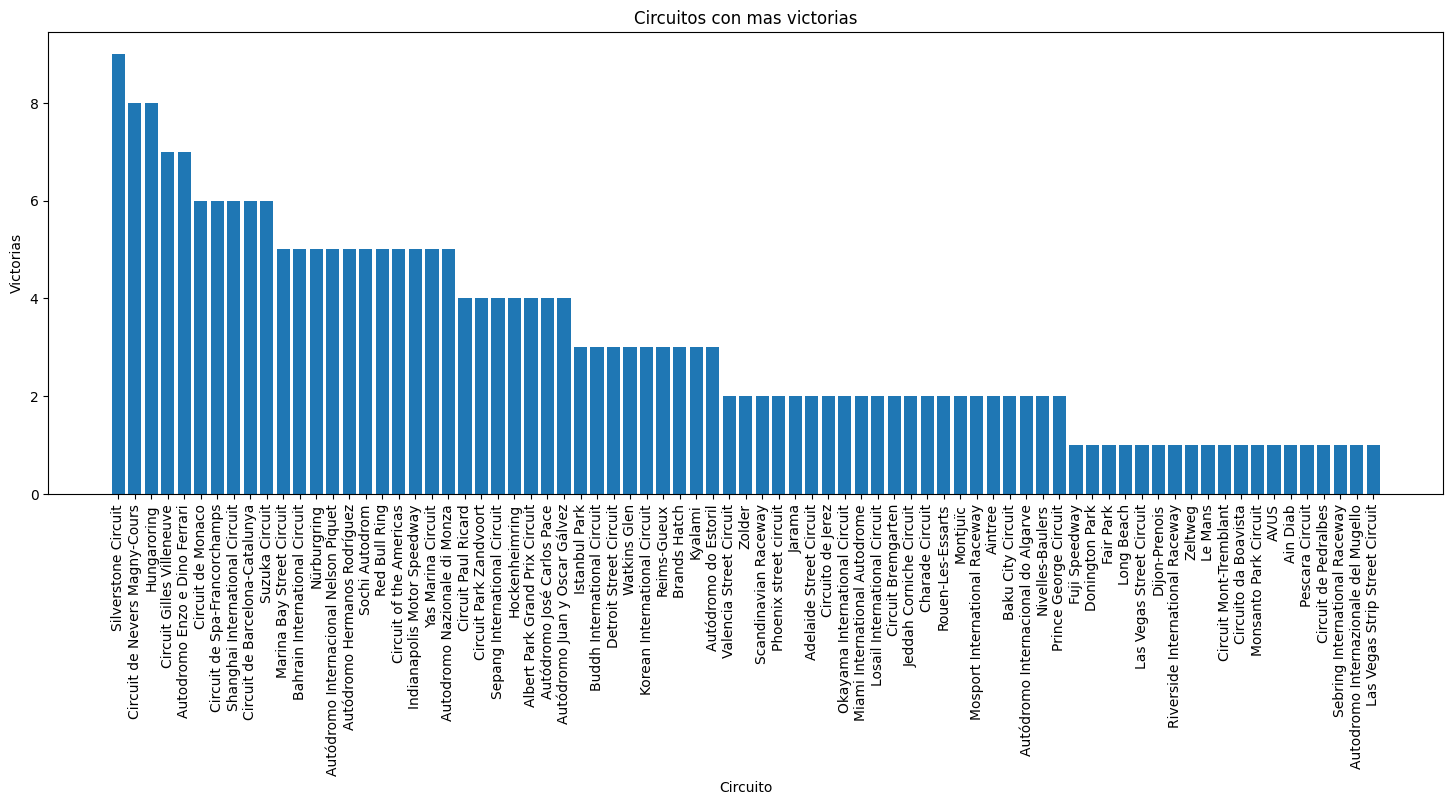

In [18]:
import matplotlib.pyplot as plt

# 1) Filtrar victorias
wins_df = result_df[result_df['positionOrder'] == 1]

drivers_df = dataframes['drivers_df']

# 2) Unir para obtener circuitId
wins_df = wins_df.merge(races_df[['raceId', 'circuitId']], on='raceId', how='left')

# 3) Contar victorias por circuito y piloto
wins_by_circuit = wins_df.groupby(['circuitId', 'driverId']).size().reset_index(name='wins')

# 4) Para cada circuito, ubicar piloto con más victorias
idx = wins_by_circuit.groupby('circuitId')['wins'].idxmax()
top_winners_by_circuit = wins_by_circuit.loc[idx].reset_index(drop=True)

# 5) Unir con drivers_df para nombre de piloto y circuits_df para nombre de circuito
top_winners_by_circuit = top_winners_by_circuit.merge(
    drivers_df[['driverId', 'code']],
    on='driverId',
    how='left'
)
top_winners_by_circuit = top_winners_by_circuit.merge(
    circuits_df[['circuitId', 'name']],
    on='circuitId',
    how='left'
)

# Ordenar de mayor a menor por número de victorias
top_winners_by_circuit = top_winners_by_circuit.sort_values(by='wins', ascending=False)

# Graficar
plt.figure(figsize=(18, 6))
plt.bar(top_winners_by_circuit['name'], top_winners_by_circuit['wins'])
plt.xlabel('Circuito')
plt.ylabel('Victorias')
plt.title('Circuitos con mas victorias')
plt.xticks(rotation=90)  # Para mejorar la visibilidad
plt.show()

In [19]:
import pandas as pd
from IPython.display import display  # Importar display para mostrar tablas en Jupyter/Colab

# Acceder a los DataFrames almacenados en el diccionario
circuits_df = dataframes['circuits_df']
constructor_results_df = dataframes['constructor_results_df']
constructor_standings_df = dataframes['constructor_standings_df']
constructors_df = dataframes['constructors_df']
races_df = dataframes['races_df']
results_df = dataframes['results_df']
seasons_df = dataframes['seasons_df']
status_df = dataframes['status_df']
pit_stops_df = dataframes['pit_stops_df']

# Unir pit_stops con races para obtener el circuito de cada carrera
pit_stops_races = pit_stops_df.merge(races_df[['raceId', 'circuitId']], on='raceId', how='left')
pit_stops_races = pit_stops_races.merge(circuits_df[['circuitId', 'name']], on='circuitId', how='left')

### **1. Número promedio de paradas por circuito**
total_stops = pit_stops_races.groupby('name')['stop'].count()
num_races = races_df.groupby('circuitId')['raceId'].count().rename_axis('circuitId')

circuit_race_counts = circuits_df[['circuitId', 'name']].merge(num_races, on='circuitId', how='left')
circuit_race_counts = circuit_race_counts.set_index('name')

avg_stops_per_circuit = (total_stops / circuit_race_counts['raceId']).dropna().reset_index()
avg_stops_per_circuit.columns = ['Circuito', 'Promedio de Paradas por Carrera']
avg_stops_per_circuit = avg_stops_per_circuit.sort_values(by='Promedio de Paradas por Carrera', ascending=False)

### **2. Tiempo promedio de parada por circuito**
avg_pit_time_per_circuit = pit_stops_races.groupby('name')['milliseconds'].mean().reset_index()
avg_pit_time_per_circuit.columns = ['Circuito', 'Tiempo Promedio de Parada (ms)']
avg_pit_time_per_circuit = avg_pit_time_per_circuit.sort_values(by='Tiempo Promedio de Parada (ms)', ascending=False)

### **3. Estrategia de paradas de los ganadores**
winners_df = results_df[results_df['positionOrder'] == 1][['raceId', 'driverId']]
winners_pit_stops = pit_stops_df.merge(winners_df, on=['raceId', 'driverId'], how='inner')
winners_pit_stops = winners_pit_stops.merge(races_df[['raceId', 'circuitId']], on='raceId', how='left')
winners_pit_stops = winners_pit_stops.merge(circuits_df[['circuitId', 'name']], on='circuitId', how='left')

avg_winner_stops_per_circuit = winners_pit_stops.groupby('name')['stop'].count().reset_index()
avg_winner_stops_per_circuit.columns = ['Circuito', 'Promedio de Paradas de Ganadores']
avg_winner_stops_per_circuit = avg_winner_stops_per_circuit.sort_values(by='Promedio de Paradas de Ganadores', ascending=False)

# 📊 Mostrar los DataFrames en Colab
display(avg_stops_per_circuit)
display(avg_pit_time_per_circuit)
display(avg_winner_stops_per_circuit)

,Circuito,Promedio de Paradas por Carrera
2,Autodromo Internazionale del Mugello,66.000000
23,Losail International Circuit,48.000000
5,Autódromo Internacional do Algarve,42.500000
9,Buddh International Circuit,39.666667
24,Marina Bay Street Circuit,36.466667
8,Baku City Circuit,36.125000
22,Las Vegas Strip Street Circuit,35.000000
21,Korean International Circuit,35.000000
16,Circuit of the Americas,32.916667
7,Bahrain International Circuit,32.666667


,Circuito,Tiempo Promedio de Parada (ms)
2,Autodromo Internazionale del Mugello,529469.500000
20,Jeddah Corniche Circuit,352250.073394
1,Autodromo Enzo e Dino Ferrari,217469.202899
8,Baku City Circuit,216192.726644
11,Circuit Park Zandvoort,201343.535088
0,Albert Park Grand Prix Circuit,191301.219048
30,Silverstone Circuit,189925.182469
6,Autódromo José Carlos Pace,177625.312411
14,Circuit de Monaco,168794.114355
32,Suzuka Circuit,139361.117537


,Circuito,Promedio de Paradas de Ganadores
6,Autódromo José Carlos Pace,34
13,Circuit de Barcelona-Catalunya,33
18,Hungaroring,33
7,Bahrain International Circuit,32
30,Silverstone Circuit,29
32,Suzuka Circuit,25
27,Red Bull Ring,25
24,Marina Bay Street Circuit,24
29,Shanghai International Circuit,24
15,Circuit de Spa-Francorchamps,24


In [ ]:
# @title Promedio de Paradas por Carrera

from matplotlib import pyplot as plt
avg_stops_per_circuit['Promedio de Paradas por Carrera'].plot(kind='hist', bins=20, title='Promedio de Paradas por Carrera')
plt.gca().spines[['top', 'right',]].set_visible(False)

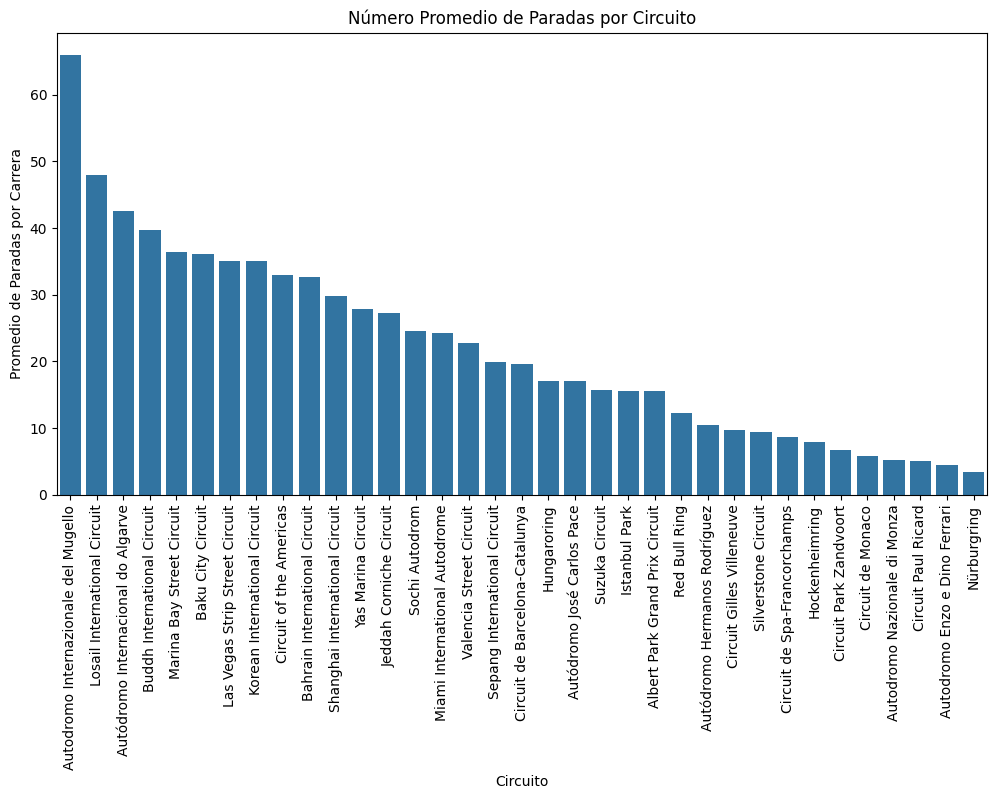

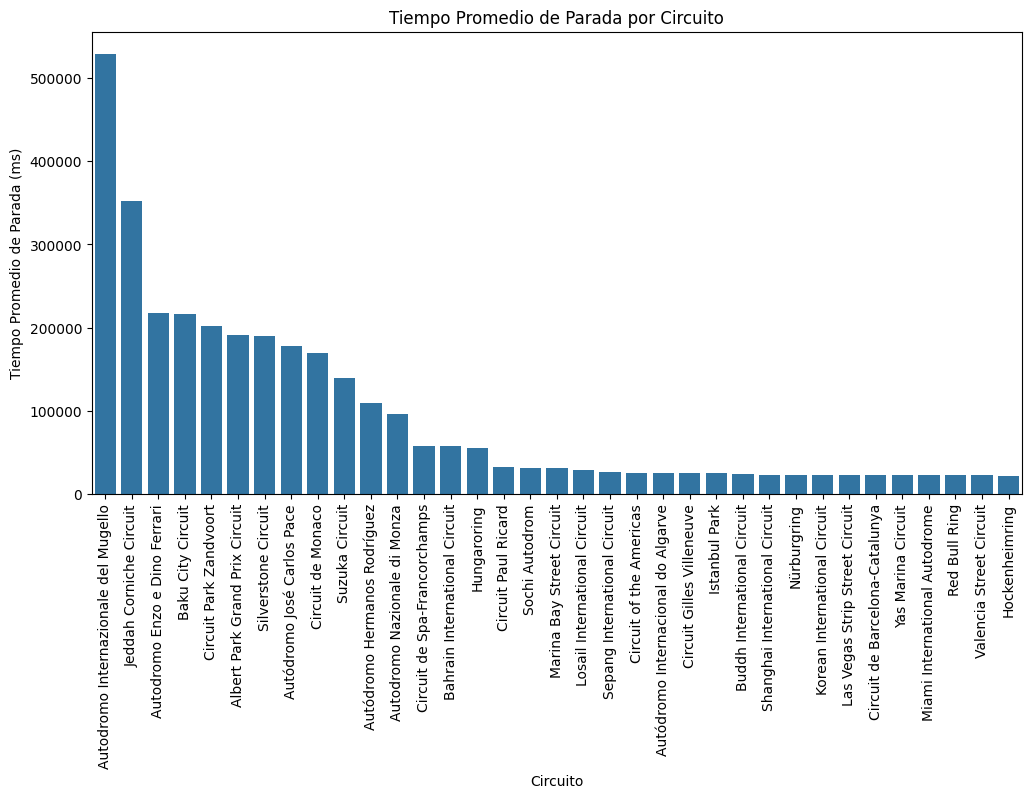

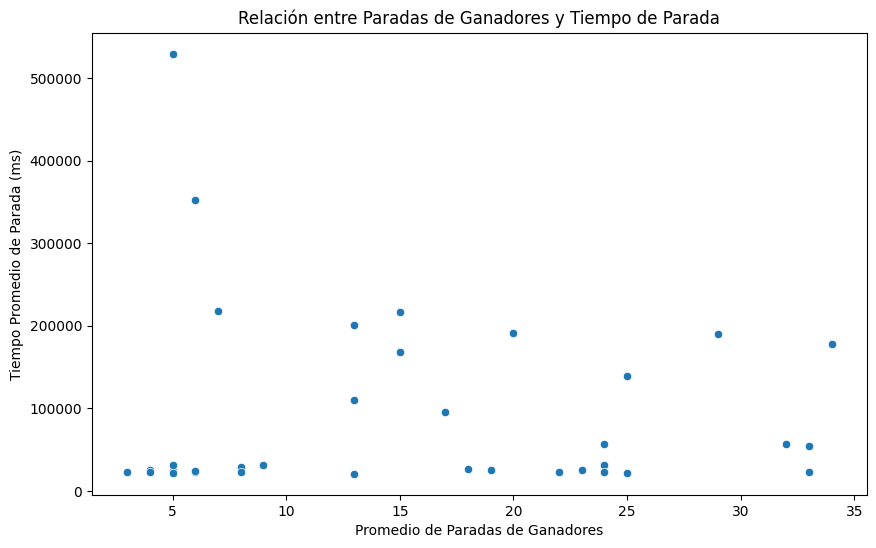

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_stops_per_circuit, x="Circuito", y="Promedio de Paradas por Carrera")
plt.xticks(rotation=90)
plt.xlabel("Circuito")
plt.ylabel("Promedio de Paradas por Carrera")
plt.title("Número Promedio de Paradas por Circuito")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_pit_time_per_circuit, x="Circuito", y="Tiempo Promedio de Parada (ms)")
plt.xticks(rotation=90)
plt.xlabel("Circuito")
plt.ylabel("Tiempo Promedio de Parada (ms)")
plt.title("Tiempo Promedio de Parada por Circuito")
plt.show()

plt.figure(figsize=(10, 6))
merged_df = avg_winner_stops_per_circuit.merge(avg_pit_time_per_circuit, on="Circuito")
sns.scatterplot(data=merged_df, x="Promedio de Paradas de Ganadores", y="Tiempo Promedio de Parada (ms)")
plt.xlabel("Promedio de Paradas de Ganadores")
plt.ylabel("Tiempo Promedio de Parada (ms)")
plt.title("Relación entre Paradas de Ganadores y Tiempo de Parada")
plt.show()